# Case Study on Probability for Data Science

Problem Statement:
    
    
To make a suitable machine learning algorithm to predict if the mushroom is
edible or poisonous (e or p) using the given dataset.
(Along with other ML algorithms, Naïve Bayes’ Classifier should be applied)
Also, if some data pre-processing is necessary do that as well.

In [14]:
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [10]:
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

In [2]:
cd C:\Users\windows\Downloads

C:\Users\windows\Downloads


In [3]:
data = pd.read_csv("mushrooms.csv")

In [28]:
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [7]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [37]:
X=data.drop('class',axis=1) 
y=data['class'] 
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


# Data visualization

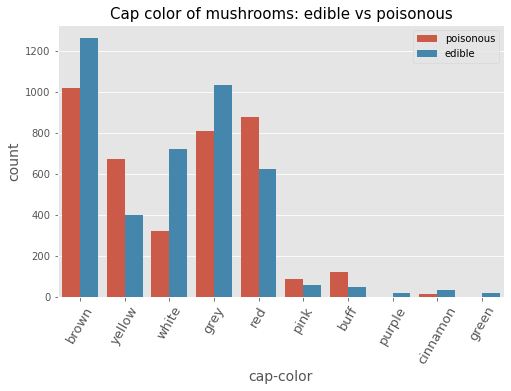

In [29]:
plt.figure(figsize=(8, 5))
sns.countplot(data = data, x = 'cap-color', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 
           labels = ['brown', 'yellow', 'white', 'grey', 'red', 'pink', 'buff', 'purple', 'cinnamon', 'green'], fontsize = 13, rotation = 60)
plt.xlabel('cap-color', fontsize=14)
plt.ylabel('count', fontsize = 14)
plt.title('Cap color of mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

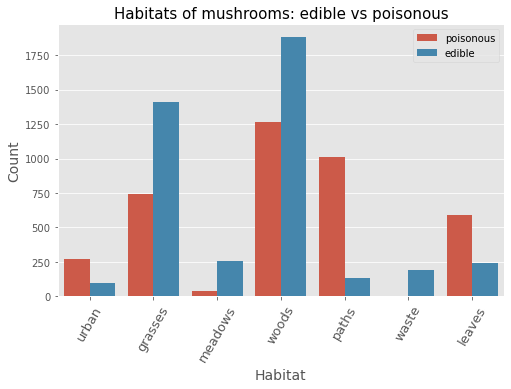

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(data = data, x = 'habitat', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5, 6], 
           labels = ['urban', 'grasses', 'meadows', 'woods', 'paths', 'waste', 'leaves'], fontsize = 13, rotation = 60)
plt.xlabel('Habitat', fontsize=14)
plt.ylabel('Count', fontsize = 14)
plt.title('Habitats of mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

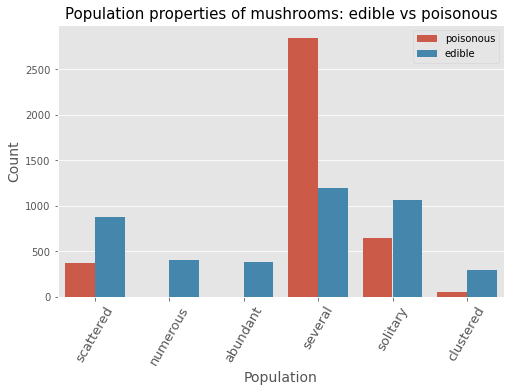

In [31]:
plt.figure(figsize=(8, 5))
sns.countplot(data = data, x = 'population', hue='class')
plt.xticks(ticks = [0, 1, 2, 3, 4, 5], 
           labels = ['scattered', 'numerous', 'abundant', 'several', 'solitary', 'clustered'], fontsize = 13, rotation = 60)
plt.xlabel('Population', fontsize=14)
plt.ylabel('Count', fontsize = 14)
plt.title('Population properties of mushrooms: edible vs poisonous', fontsize = 15)
plt.legend(labels=['poisonous', 'edible'], loc='upper right')
plt.show()

# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [39]:
y

array([1, 0, 0, ..., 0, 1, 0])

In [40]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


# Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

PCA

In [46]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [47]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
def print_score(classifier,X_train,y_train,X_test,y_test,train=True):
    if train == True:
        print("Training results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_train,classifier.predict(X_train))))
        print('Classification Report:\n{}\n'.format(classification_report(y_train,classifier.predict(X_train))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_train,classifier.predict(X_train))))
        res = cross_val_score(classifier, X_train, y_train, cv=10, n_jobs=-1, scoring='accuracy')
        print('Average Accuracy:\t{0:.4f}\n'.format(res.mean()))
        print('Standard Deviation:\t{0:.4f}'.format(res.std()))
    elif train == False:
        print("Test results:\n")
        print('Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,classifier.predict(X_test))))
        print('Classification Report:\n{}\n'.format(classification_report(y_test,classifier.predict(X_test))))
        print('Confusion Matrix:\n{}\n'.format(confusion_matrix(y_test,classifier.predict(X_test))))

# SVM

In [48]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=42)

classifier.fit(X_train,y_train)

SVC(random_state=42)

In [49]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9074

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      3365
           1       1.00      0.81      0.89      3134

    accuracy                           0.91      6499
   macro avg       0.92      0.90      0.91      6499
weighted avg       0.92      0.91      0.91      6499


Confusion Matrix:
[[3354   11]
 [ 591 2543]]

Average Accuracy:	0.9060

Standard Deviation:	0.0084


In [50]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9095

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       843
           1       1.00      0.82      0.90       782

    accuracy                           0.91      1625
   macro avg       0.92      0.91      0.91      1625
weighted avg       0.92      0.91      0.91      1625


Confusion Matrix:
[[840   3]
 [144 638]]



# KNN

In [51]:
from sklearn.neighbors import KNeighborsClassifier as KNN

classifier = KNN()
classifier.fit(X_train,y_train)

KNeighborsClassifier()

In [52]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.9640

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      3365
           1       0.98      0.94      0.96      3134

    accuracy                           0.96      6499
   macro avg       0.97      0.96      0.96      6499
weighted avg       0.96      0.96      0.96      6499


Confusion Matrix:
[[3304   61]
 [ 173 2961]]

Average Accuracy:	0.9471

Standard Deviation:	0.0114


In [53]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.9378

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       843
           1       0.96      0.91      0.93       782

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625


Confusion Matrix:
[[814  29]
 [ 72 710]]



# Gaussian Naive-Bayes

In [56]:
from sklearn.naive_bayes import GaussianNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

GaussianNB()

In [57]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8623

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.87      3365
           1       0.91      0.79      0.85      3134

    accuracy                           0.86      6499
   macro avg       0.87      0.86      0.86      6499
weighted avg       0.87      0.86      0.86      6499


Confusion Matrix:
[[3117  248]
 [ 647 2487]]

Average Accuracy:	0.8621

Standard Deviation:	0.0116


In [58]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8554

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       843
           1       0.90      0.78      0.84       782

    accuracy                           0.86      1625
   macro avg       0.86      0.85      0.85      1625
weighted avg       0.86      0.86      0.85      1625


Confusion Matrix:
[[777  66]
 [169 613]]



# Bernoulli Naive-Bayes

In [59]:
from sklearn.naive_bayes import BernoulliNB as NB

classifier = NB()
classifier.fit(X_train,y_train)

BernoulliNB()

In [60]:
print_score(classifier,X_train,y_train,X_test,y_test,train=True)

Training results:

Accuracy Score: 0.8881

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.98      0.90      3365
           1       0.97      0.79      0.87      3134

    accuracy                           0.89      6499
   macro avg       0.90      0.88      0.89      6499
weighted avg       0.90      0.89      0.89      6499


Confusion Matrix:
[[3285   80]
 [ 647 2487]]

Average Accuracy:	0.8881

Standard Deviation:	0.0100


In [61]:
print_score(classifier,X_train,y_train,X_test,y_test,train=False)

Test results:

Accuracy Score: 0.8806

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.97      0.89       843
           1       0.96      0.78      0.86       782

    accuracy                           0.88      1625
   macro avg       0.89      0.88      0.88      1625
weighted avg       0.89      0.88      0.88      1625


Confusion Matrix:
[[818  25]
 [169 613]]

